### Spam Detection using Text Mining and Naive Bayes Classifier

- Each SMS message can be a spam or a ham (legitimate).

In [1]:
# Import useful libararies used for data management
import pandas as pd
import numpy as np

# load dataset 'SpamHamEmail.csv'
dataset = pd.read_csv('SpamHamEmail.csv')

In [2]:
dataset.head()

,Text,Class
0,"Hi,Hope I am not writing to wrong address. I a...",spam
1,-----BEGIN PGP SIGNED MESSAGE-----Hash: SHA1I'...,ham
2,"THIS ONE IS BEING PROMOTED, TAKE ADVANTAGE!!Sy...",spam
3,Take a look at this ONE!!Campaign for: CDYV - ...,spam
4,UP 500% in 2 dayshttp://img217.imageshack.us/m...,spam


In [3]:
dataset['Class'].value_counts()

ham     381
spam    344
Name: Class, dtype: int64

### Data Preparation

In [4]:
# convert the 'label' column into a numeric variable; 'ham' as 0, 'spam' as 1
dataset['Label'] = dataset['Class'].map({'ham':0, 'spam':1})

In [5]:
dataset.head()

,Text,Class,Label
0,"Hi,Hope I am not writing to wrong address. I a...",spam,1
1,-----BEGIN PGP SIGNED MESSAGE-----Hash: SHA1I'...,ham,0
2,"THIS ONE IS BEING PROMOTED, TAKE ADVANTAGE!!Sy...",spam,1
3,Take a look at this ONE!!Campaign for: CDYV - ...,spam,1
4,UP 500% in 2 dayshttp://img217.imageshack.us/m...,spam,1


In [6]:
# Now let's define X and y 
X = dataset['Text']
y = dataset['Label']

In [7]:
# show the dimension of the X
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html
X.shape

(725,)

In [8]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Now we are ready to vectorize the data
# first, instantiate the vectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# When building the vocabulary ignore terms that have a document frequency strictly lower than the min_df (proportion), or higher than max_df
vectorizer = CountVectorizer(lowercase=True,stop_words='english',min_df=0.02, max_df=0.5)

In [9]:
# Learn the vocabulary dictionary and return term-document matrix.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform
X_vec = vectorizer.fit_transform(X)

In [10]:
# print the terms
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names
print(vectorizer.get_feature_names())

['04', '089', '10', '11', '2007', '25', '425', '500', 'access', 'action', 'add', 'aggresive', 'alert', 'alternative', 'andrew', 'apr', 'bbc', 'begin', 'bilder', 'bounceemail', 'branch', 'btw', 'bullish', 'burn', 'buy', 'buying', 'canadianpharmacy', 'cdyv', 'climb', 'cnn', 'com', 'coming', 'curr', 'current', 'day', 'dear', 'details', 'don', 'drop', 'expected', 'explode', 'friend', 'gmail', 'going', 'great', 'hash', 'hi', 'hold', 'hosting', 'hot', 'http', 'huge', 'id', 'imageshack', 'img', 'info', 'insider', 'jerry', 'jpg', 'just', 'know', 'knows', 'kst', 'latest', 'like', 'line', 'look', 'looks', 'lookup', 'meet', 'message', 'new', 'news', 'nick', 'org', 'patch', 'pgp', 'php', 'picture', 'place', 'plain', 'png', 'price', 'prices', 'profit', 'promoting', 'purchase', 'recommendation', 'report', 'revno', 'ronniesahlberg', 's6', 'samba', 'search', 'short', 'signed', 'somebody', 'start', 'steadily', 'strong', 'sure', 'sym', 'sym8ol', 'symbol', 'talk', 'target', 'term', 'text', 'thanks', 'tri

In [11]:
len(vectorizer.get_feature_names())

127

In [12]:
# get the count of each terms in each document
print(X_vec.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [13]:
print(X_vec)

(0, 55)	1
  (0, 19)	1
  (0, 70)	1
  (0, 69)	1
  (0, 46)	1
  (1, 118)	1
  (1, 45)	1
  (1, 95)	1
  (1, 76)	1
  (1, 17)	1
  (1, 70)	1
  (2, 61)	1
  (2, 96)	1
  (2, 47)	1
  (2, 24)	1
  (2, 11)	1
  (2, 9)	1
  (2, 6)	1
  (2, 105)	1
  (2, 34)	1
  (2, 1)	1
  (2, 82)	2
  (2, 32)	1
  (2, 27)	1
  (2, 102)	1
  :	:
  (722, 50)	1
  (723, 111)	1
  (723, 73)	1
  (723, 20)	1
  (723, 110)	1
  (723, 14)	1
  (723, 109)	3
  (723, 52)	1
  (723, 89)	1
  (723, 92)	3
  (723, 74)	3
  (724, 85)	1
  (724, 40)	1
  (724, 43)	1
  (724, 121)	1
  (724, 99)	1
  (724, 101)	2
  (724, 24)	1
  (724, 9)	1
  (724, 6)	1
  (724, 105)	1
  (724, 34)	1
  (724, 1)	1
  (724, 82)	2
  (724, 27)	1


### Model Building using Multinomial NB

In [14]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes Classifier, which is frequently used in Tf-idf
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
mnb = MultinomialNB()

### Model Evaluation

In [15]:
# Now let's import cross validation
from sklearn.model_selection import cross_val_score,cross_val_predict

In [16]:
# Make class prediction for test set
# y_pred_class is the binary label
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict
score = cross_val_score(mnb,X_vec,y,cv=10)


In [17]:
score.mean()

0.9447869101978691

In [18]:
# import libararies for evaluation measures
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
# get predicted class for y
y_pred_class = cross_val_predict(mnb,X_vec,y,cv=10)

In [20]:
y_pred_class

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [21]:
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print("Classification Report:","\n", classification_report(y, y_pred_class))

Confusion Matrix: 
 [[374   7]
 [ 33 311]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       381
           1       0.98      0.90      0.94       344

    accuracy                           0.94       725
   macro avg       0.95      0.94      0.94       725
weighted avg       0.95      0.94      0.94       725



In [22]:
# y_pred_prob is the probability estimate
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict_proba
y_pred_prob = cross_val_predict(mnb,X_vec,y,cv=10, method ='predict_proba')

In [23]:
y_pred_prob

array([[4.41389381e-03, 9.95586106e-01],
       [9.99999999e-01, 9.22012029e-10],
       [3.38535032e-27, 1.00000000e+00],
       ...,
       [9.99916566e-01, 8.34335797e-05],
       [1.00000000e+00, 5.57564770e-36],
       [1.23559634e-27, 1.00000000e+00]])

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# y_test is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:,1], pos_label=1)


In [25]:
# Aread under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.9930186778978208

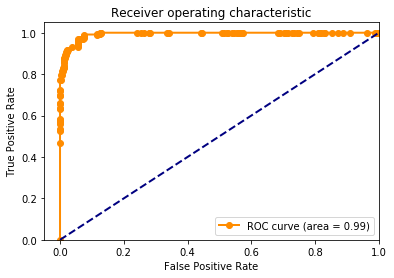

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [27]:
# train the model using all training set 
mnb.fit(X_vec, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
# Now let's see the ham that has been classcified as Spam
X[(y == 0) & (y_pred_class==1)]

226    Hi, Is there a program that will allow a linux...
347    Sorry,I know I should write all in one answer ...
417    Is there going to be a Perl 6 equivalent to $A...
450    What RPC implements NetLocalGroupGetMembers?Th...
485    ) const int slot = (reg_alloc + 7) )) 3; reg_a...
625    - Tracce di stupro, dottore?Compliments, If yo...
632    Alert.http://i83.imagethrust.com/i/1035919/l3p...
Name: Text, dtype: object

#### TODO
- Please try TfidfVectorizer later to see the model performance (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- You need to use "from sklearn.feature_extraction.text import TfidfVectorizer" to import the TfidfVectorizer first